# Project Goal

OilyGiant seeks the best region for a new well. To choose the location, we will collect the oil well parameters in the selected region, oil quality and volume of reserves, and build a model for predicting the volume of reserves in the new wells. We will then pick the oil wells with the highest estimated values. We will select the top performing 200 wells and pick the region with the highest total profit for the selected oil wells. We will further build a model using a bootstrapping technique with this data to predict the region with the highest profit margin. We will analyze potential profit and risks within a 95% confidence interval to determine the region with the highest probable profit.

### Initializing Data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [41]:
# Importing files

r0 = pd.read_csv('geo_data_0.csv')
r1 = pd.read_csv('geo_data_1.csv')
r2 = pd.read_csv('geo_data_2.csv')

## Data Preprocessing
We will preprocess the data of each dataframe at a time.

###  Region 0 Data

In [42]:
# Review r0 data

r0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [43]:
r0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In r0, there were 10000 entries and three columns. Features f0, f1, and f1 were floats. The id column was an object. Since the id column provides unique information that would not predict our target variable, we will drop the id column.

In [44]:
# Dropping 'id' column

r0 = r0.drop(['id'], axis=1)

In [45]:
# Checking for missing values

r0.isnull().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

There were no missing values in r0.

In [46]:
# Checking for duplicates

duplicate = r0[r0.duplicated()]
duplicate

,f0,f1,f2,product


In [47]:
r0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In r0, for product value the mean was 92, the max was 185 and the min was 0.

In [48]:
r0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


There was a slight positive correlation between f2 and the product, and a slight negative correlation between f0 and f1, but the correlations were not significant enough to affect our model.

###  Region 1 Data

In [49]:
# Review geo_1 data

r1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [50]:
r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In r1, there were 10000 entries and three columns. Features f0, f1, and f1 were floats. The id column was an object. Since the id column provides unique information that would not predict our target variable, we will drop the id column.

In [51]:
# Dropping 'id' column

r1 = r1.drop(['id'], axis=1)

In [52]:
# Checking for missing values

r1.isnull().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

There were no missing values in r1.

In [53]:
# Checking for duplicates

duplicate = r1[r1.duplicated()]
duplicate

,f0,f1,f2,product


There were no duplicates in r1.

In [54]:
r1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In r1, for product value the mean was 57, the max was 137 and the min was 0.

In [55]:
r1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


For r1, f2 and the product were almost perfectly positively correlated (0.99). This colinearity might affect our model.

###  Region 2 Data

In [56]:
# Review r2 data

r2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [57]:
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In r2, there were 10000 entries and three columns. Features f0, f1, and f1 were floats. The id column was an object. Since the id column provides unique information that would not predict our target variable, we will drop the id column.

In [58]:
# Dropping 'id' column

r2 = r2.drop(['id'], axis=1)

In [59]:
# Checking for missing values

r2.isnull().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

There were no missing values in r2.

In [60]:
# Checking for duplicates

duplicate = r2[r2.duplicated()]
duplicate

,f0,f1,f2,product


There were no duplicates in r2.

In [61]:
r2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In r2, for product value the mean was 94, the max was 190 and the min was 0.

In [62]:
r2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


For r2, there was a slightly positive correlation between f2 and the product but it was insignificant (0.44).

##  Exploratory Data Analysis

Let's compare the distribution of values of the product across regions.

### Product Across Regions Histogram

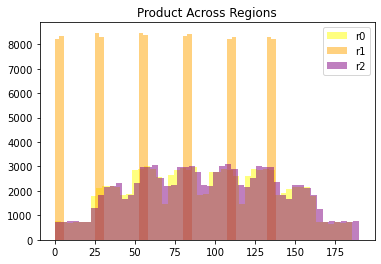

In [63]:
# Plotting a histogram to compare product across regions

plt.hist(r0['product'], alpha=.5, color= 'yellow', bins=50);
plt.hist(r1['product'], alpha=.5, color= 'orange', bins=50);
plt.hist(r2['product'], alpha=.5, color= 'purple', bins=50);
plt.legend(['r0', 'r1', 'r2'])
plt.title('Product Across Regions')
plt.show()

The values of region 0 and 2 are similar, yet the values of region 1 do not have a normal distribution, with values being divided into six different levels.

### Product Across Regions Boxplot

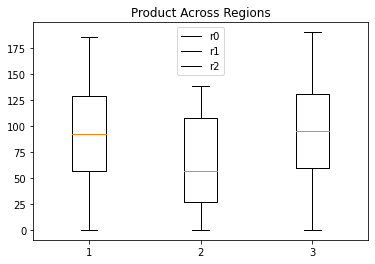

In [64]:
# Plotting a boxplot to compare product across regions

plt.boxplot([r0['product'], r1['product'], r2['product']]);
plt.legend(['r0', 'r1', 'r2'])
plt.title('Product Across Regions')
plt.show()

A boxplot comparing the product distribution across regions displays that the region 0 and 2 had a similar mean and range, but region 1 had a lower mean and lower range overall.

## Model Training and Results

We will train a model to predict the profitability of wells for each region.

### Preparing Data for Model Training

In [65]:
# Preparing r0 data for model traininng

# Selecting the features and target
r0x = r0.drop(['product'], axis=1)
r0y = r0['product']
    

# Splitting data into training (75%) and validation (25%) sets
r0_xtrain, r0_xvalid, r0_ytrain, r0_yvalid = train_test_split(
r0x, r0y, test_size=0.25, random_state=12345)

In [66]:
# Preparing r1 data for model traininng

# Selecting the features and target
r1x = r1.drop(['product'], axis=1)
r1y = r1['product']
    

# Splitting data into training (75%) and validation (25%) sets
r1_xtrain, r1_xvalid, r1_ytrain, r1_yvalid = train_test_split(
r1x, r1y, test_size=0.25, random_state=12345)

In [67]:
# Preparing r2 data for model traininng

# Selecting the features and target
r2x = r2.drop(['product'], axis=1)
r2y = r2['product']
    

# Splitting data into training (75%) and validation (25%) sets
r2_xtrain, r2_xvalid, r2_ytrain, r2_yvalid = train_test_split(
r2x, r2y, test_size=0.25, random_state=12345)

Now that we have split the data of each region into training and validation sets for features and targets, we will train a model for each region.

### Function for Model Training

In [68]:
# Creating a function to develop a model and make predictions

def model(xtrain, xvalid, ytrain, yvalid):
    
    model = LinearRegression().fit(xtrain, ytrain)
    predictions_valid =  model.predict(xvalid)
    mean_volume = predictions_valid.mean()
    model_RMSE = np.sqrt(mean_squared_error(predictions_valid, yvalid))
    score = model.score(xvalid, yvalid)
    
    print('Average volume of predicted reserves:', mean_volume)
    print('Model_RMSE:',model_RMSE)
    print('R-Squared:', score)
    
    return model.predict(xvalid), model.score(xvalid, yvalid)


###  Region 0 Model

In [69]:
#Region 0 Predictions:
r0_prediction, r0_score = model(r0_xtrain, r0_xvalid, r0_ytrain, r0_yvalid)

Average volume of predicted reserves: 92.59256778438035
Model_RMSE: 37.5794217150813
R-Squared: 0.27994321524487786


For Region 0:
The average volume of predicted reserves was 93.
The RMSE for our LinearRegression model was 38. So the standard deviation of the residuals of our model was 38.
The R-Squared score was 0.28, meaning only 28% of the variability observed in the target variable is explained by the model.

###  Region 1 Model

In [70]:
r1_prediction, r1_score = model(r1_xtrain, r1_xvalid, r1_ytrain, r1_yvalid)

Average volume of predicted reserves: 68.72854689544602
Model_RMSE: 0.893099286775617
R-Squared: 0.9996233978805127


For Region 1:
The average volume of predicted reserves was 69.
The RMSE for our LinearRegression model was 0.89. So the standard deviation of the residuals of our model was 0.9.
The R-Squared score was 0.99, meaning only 99% of the variability observed in the target variable is explained by the model.

###  Region 2 Model

In [71]:
r2_prediction, r2_score = model(r2_xtrain, r2_xvalid, r2_ytrain, r2_yvalid)

Average volume of predicted reserves: 94.96504596800489
Model_RMSE: 40.02970873393434
R-Squared: 0.20524758386040443


For Region 2:
The average volume of predicted reserves was 95.
The RMSE for our LinearRegression model was 40. So the standard deviation of the residuals of our model was 40.
The R-Squared score was 0.21, meaning only 21% of the variability observed in the target variable is explained by the model.

## Preparation for Profit Calculation

We will calculate the volume of reserves sufficient for developing a new well without losses:

In [72]:
# Profit Calculation specifics

# Number of wells to be developed.
WELLS_DEV = 200 

# Total well development budget.
BUDGET = 100000000

# Budget per well.
BUDGET_PER_WELL = BUDGET / WELLS_DEV

# Revenue (in USD) per one unit of product.
PROD_REVENUE = 4500

The volume of reserves sufficient for developing a new well without losses is: 
500,000/4500 = 111.11

The average volume of reserves for one well in each region is lower than the volume of reserves sufficient for developing a new well without losses.
 - Region 0  - 93
 - Region 1  - 69
 - Region 2  - 95

We will evaluate the average volume of reserves using the top 200 wells per region.

## Function to Calculate Profit



In [73]:
#Create function to select best 200 wells from each region based on predictions.

def best_200(region_target, prediction):
    predictions_sorted = pd.Series(prediction, index=region_target.index).sort_values(ascending=False)
    top_target = region_target.loc[predictions_sorted.index][:WELLS_DEV]
    return top_target

# Obtain top 200 wells per region and it's actual product value based on highest predicted value.
r0_top = best_200(r0_yvalid, r0_prediction)
r1_top = best_200(r1_yvalid, r1_prediction)
r2_top = best_200(r2_yvalid, r2_prediction)

In [74]:
#Create a function to calculate the potential profit from the top 200 wells by region.

def top_profit(region_top):
    profit = (((region_top.sum() * PROD_REVENUE) - BUDGET) / 1000000).round(2)
    total_vol = (region_top.sum() / 1000).round(2)
    return profit, total_vol

display(pd.DataFrame([top_profit(r0_top), top_profit(r1_top), top_profit(r2_top)], \
                   columns=['Profit (USD Million)', 'Barrels (Million)']))

,Profit (USD Million),Barrels (Million)
0,33.21,29.60
1,24.15,27.59
2,27.10,28.25


## Region for Oil Development

Based on a comparison of the top 200 performing wells in the regions, Region 0 had the highest target volume of reserve in accordance with predictions: 29.60 million barrels. The profit from the top 200 wells was estimated to be around 33.21 million.

In order to get a more accurate assessment of the projected revenue for the regions, we will use bootstrapping and assess the predicted profit within a 95% confidence interval.

## Bootstrap Profit

We will use the bootstrapping resampling technique with 1000 samples to find the distribution of profit.

In [75]:
# Creating a function to obtain profit values with bootstrapping from 1000 samples:

#Create random number generator using RandomState.
state = RandomState(12345)

def bootstrap(region_yvalid, prediction):
    values = []
    preds = pd.Series(prediction, index=region_yvalid.index)
    
    for i in range(1000):
        target_subsample = region_yvalid.sample(n=500, replace=True, random_state=state)
        preds_subsample = preds[target_subsample.index]      
        best_200_wells = best_200(target_subsample, preds_subsample)
        values.append(top_profit(best_200_wells)[0])
        
    values_series = pd.Series(values)
    
    return values_series

In [76]:
r0_bootstrap_profit = bootstrap(r0_yvalid, r0_prediction)

In [77]:
r1_bootstrap_profit = bootstrap(r1_yvalid, r1_prediction)

In [78]:
r2_bootstrap_profit = bootstrap(r2_yvalid, r2_prediction)  

## Confidence Interval

We will explore the predicted profit within a 95% confidence interval (95% CI). When calculating the confidence interval, we will use the distribution of profit taken from the bootstrapping results.

In [79]:
#Create function to calculate key values. 
#To get 95% confidence interval, find values between 2.5% and 97.5% using the quantile method.

def key_values(bootstrapped):

    mean = round(bootstrapped.mean(), 2)
    risk = ((bootstrapped < 0).mean()) * 100
    lower = bootstrapped.quantile(.025).round(2)
    upper = bootstrapped.quantile(.975).round(2)
    return mean, risk, (lower, upper)

display(pd.DataFrame([key_values(r0_bootstrap_profit), \
                      key_values(r1_bootstrap_profit), \
                      key_values(r2_bootstrap_profit)], \
                      columns=['Mean (USD Mill)', 'Risk (%)', 'Conf. Interval']))

,Mean (USD Mill),Risk (%),Conf. Interval
0,4.26,6.0,"(-1.02, 9.48)"
1,5.18,0.2,"(1.28, 9.54)"
2,4.20,6.1,"(-1.16, 9.9)"


Based on the bootstrapping method, region 1 represents the lowest risk (0.2%) and the highest potential revenue (5.18 million USD), within a 95% confidence interval. We, therefore, suggest region 1 as the ideal region for oil development.

# Conclusion

We prepared the data for region 0, 1, and 2 and built a model to predict the volume of reserves in the new wells based on the features of the wells in each region so that we could compare the probable volume and profit and identify the best region for oil well development.

### Data Preprocessing

The dataframe for each region contained 100,000 entries and three features (f0, f1, and f2) and an id column. Since the id column provided unique information that would not predict our target variable, we dropped the id column. There were no missing values and no duplicates.

#### Region 0
Product value mean was 92, the max was 185 and the min was 0. For r0, there was a slight positive correlation between f2 and the product, and a slight negative correlation between f0 and f1, but the correlations were not significant enough to affect our model.

#### Region 1
Product value mean was 57, the max was 137 and the min was 0. For r1, f2 and the product were almost perfectly positively correlated (0.99). This colinearity might affect our model.

#### Region 2
Product value mean was 94, the max was 190 and the min was 0. For r2, there was a slightly positive correlation between f2 and the product but it was insignificant (0.44).

### Exploratory Data Analysis

We plotted a histogram comparing product values of each regions. The values of region 0 and 2 are similar and have a somewhat normal distribution, yet the values of region 1 do not have a normal distribution, with values being divided into six distinct distributions.

We also plotted a boxplot comparing the product values across regions. The boxplot displayed that region 0 and 2 had a similar mean and range, and region 1 had a lower mean and lower range overall.

### Model Training

We trained a model to predict the profitability of wells for each region. We selected f0, f1, and f2 as our features, and the product as our target. We split the data for each region into training (75%) and validation (25%) sets.


We then trained a model using linear regression. The results for each region were:

#### Region 0:
The average volume of predicted reserves was 93. The RMSE for our LinearRegression model was 38. So the standard deviation of the residuals of our model was 38. The R-Squared score was 0.28, meaning only 28% of the variability observed in the target variable is explained by the model.

#### Region 1:
The average volume of predicted reserves was 69. The RMSE for our LinearRegression model was 0.89. So the standard deviation of the residuals of our model was 0.9. The R-Squared score was 0.99, meaning only 99% of the variability observed in the target variable is explained by the model.

#### Region 2:
The average volume of predicted reserves was 95. The RMSE for our LinearRegression model was 40. So the standard deviation of the residuals of our model was 40. The R-Squared score was 0.21, meaning only 21% of the variability observed in the target variable is explained by the model.

#### We prepared for profit calculation using the following data:

Number of wells to be developed: 200
Total well development budget: 100000000
Revenue (in USD) per one unit of product:4500

The volume of reserves sufficient for developing a new well without losses is: 
500,000/4500 = 111.11

#### The average volume of reserves for one well in each region was lower than the volume of reserves sufficient for developing a new well without losses.
 - Region 0  - 93
 - Region 1  - 69
 - Region 2  - 95

We then explored the average volume of reserves in wells using a selection of the best 200 wells in each region. Based on a comparison of the top 200 performing wells in the regions, Region 0 had the highest target volume of reserve in accordance with predictions: 29.60 million barrels. The profit from its top 200 wells was estimated to be around 33.21 million.

In order to obtain a 95% confidence interval (95% CI) around our estimate of the mean difference between the profitability of the 3 regions, we used the bootstrapping resampling technique with 1000 samples. We calculated the distribution of profit within a 95% CI.

Based on the bootstrapping method, region 1 represented the lowest risk (0.2%) and the highest potential revenue (5.18 million USD), within a 95% confidence interval. We, therefore, suggest region 1 as the ideal region for oil development.
